In [6]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os
from skimage import io, color
from skimage.transform import resize

In [3]:
model_path = "/users/gursi/desktop/ml/saved_models//digits_classifier.h5"
folder = '/users/gursi/desktop/ml/sample_sets/digits_sample'
classes = [0,1,2,3,4,5,6,7,8,9]
target_size = 28 

In [4]:
pretrained_model = load_model(model_path)

In [7]:
items = os.listdir(folder)
images_arr = []

for var1 in items :
    img = color.rgb2gray(io.imread(folder + '/'+ var1)) 
    img = resize(img, (target_size, target_size), anti_aliasing = True)
    img_arr = image.img_to_array(img).copy()
    img_arr = img_arr/255.0
    images_arr.append(img_arr)

In [10]:
model_input = []
for var3 in images_arr :
    model_input.append(var3.reshape(1,target_size,target_size,1).copy())

In [11]:
preds = []

for var4 in model_input :
    prediction = pretrained_model.predict(var4)
    pred_word = classes[prediction.argmax()]
    preds.append(pred_word)

print(preds)

[3, 3, 3, 3, 3]


In [12]:
nrows = 0
ncols = 4
while True:
    if nrows*ncols > len(preds):
        break
    nrows = nrows + 1

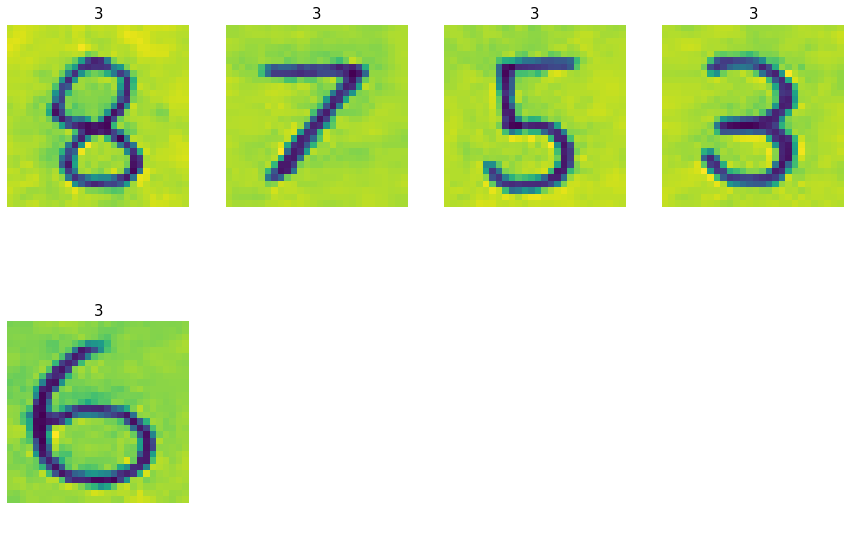

In [14]:
fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = (15,nrows*5))

pic_counter = 0
for var5 in ax :
    for var6 in var5 :
        
        try :
            var6.imshow(images_arr[pic_counter])
            var6.set_title(preds[pic_counter], fontsize = 15)
        except IndexError :
            pass
        
        var6.axis(False)
        pic_counter = pic_counter + 1